In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
user_data=pd.read_csv('/Users/polina/Downloads/user_data.csv')
logs=pd.read_csv('/Users/polina/Downloads/logs.csv')

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11509/915066801.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [4]:
#Сколько уникальных значений принимает переменная platform?

In [5]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [6]:
#Какой клиент совершил больше всего успешных операций? (success == True)

In [7]:
list=logs.query('success == True')\
.groupby('client').agg({'success':'count'})\
.reset_index()\
.query('success == 41').client #.success.value_counts()

In [8]:
list_2=list.tolist()


In [9]:
#Способ №2

In [10]:
successful_clients=logs.query('success == True')\
.groupby('client').agg({'success':'count'})\
.reset_index().sort_values('success',ascending=False)

In [11]:
', '.join([str(client) for client in list_2])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [12]:
#С какой платформы было совершено наибольшее количество успешных операций?


In [13]:
logs.groupby('platform')\
.agg({'success':'count'})

,success
platform,
computer,1505
phone,2753
tablet,242


In [14]:
#способ 2

In [15]:
logs.query('success == True').platform.value_counts()

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

In [16]:
#Какая платформа наиболее популярна среди премиумных клиентов?

In [17]:
data = user_data.merge(logs, how='inner',on='client')

In [18]:
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [19]:
data.query('premium==True').platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [20]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [21]:
#распределение возраста клиентов в зависимости от типа клиента (премиум или нет) 

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11509/1229610756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium==False').age)
/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11509/1229610756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.q

<Axes: xlabel='age', ylabel='Density'>

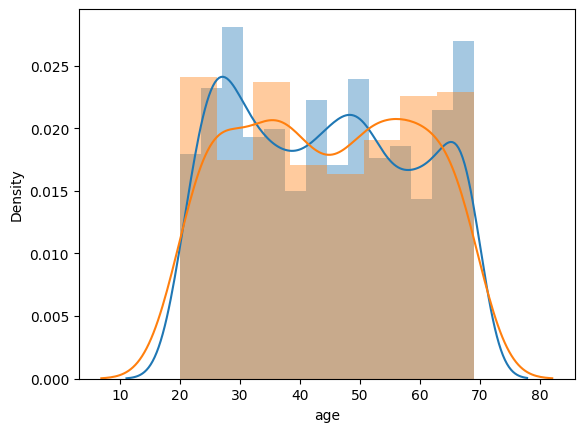

In [22]:
sns.distplot(data.query('premium==False').age)
sns.distplot(data.query('premium==True').age)

In [23]:
#Способ 2


/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11509/1819044998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium==False').age, ax=ax[0],color='green')
/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11509/1819044998.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

<Axes: xlabel='age', ylabel='Density'>

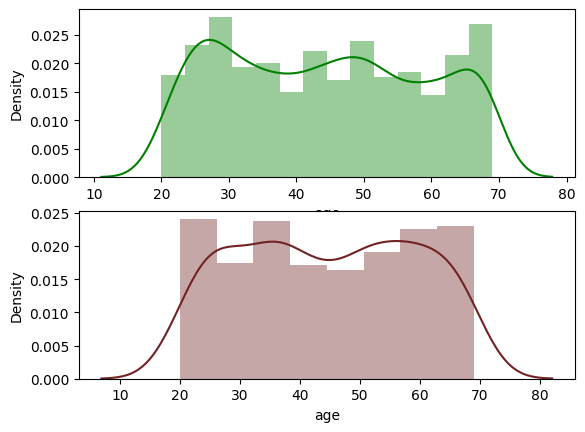

In [24]:
fig, ax=plt.subplots(nrows=2,ncols=1)
sns.distplot(data.query('premium==False').age, ax=ax[0],color='green')
sns.distplot(data.query('premium==True').age, ax=ax[1],color='#712323')

In [25]:
#Постройте график распределения числа успешных операций: 
#x – число успешных операций
#y – число клиентов, совершивших такое количество успешных операций

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11509/1820281069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs.query('success==True').client.value_counts(),kde=False)


<Axes: xlabel='count'>

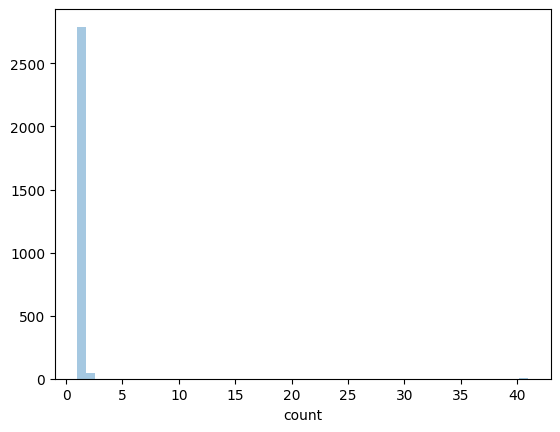

In [26]:
sns.distplot(logs.query('success==True').client.value_counts(),kde=False)

In [27]:
#Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, 
#используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. 
#Если размер графика получается небольшим, можно добавить 
#plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

In [28]:
logs.query('success==True and platform=="computer"')

,client,success,platform,time
4,10931,True,computer,1585468629
7,32167,True,computer,1585457972
9,71087,True,computer,1585458446
11,502,True,computer,1585476186
13,51575,True,computer,1585409788
...,...,...,...,...
4487,68031,True,computer,1585464203
4489,85769,True,computer,1585447052
4491,81031,True,computer,1585401631
4493,92584,True,computer,1585408896


In [29]:
data_age=logs.merge(user_data,how='left',on='client')

In [30]:
data_age

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0
...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,False,66.0
4496,73299,True,phone,1585458370,NaN,NaN
4497,8967,True,phone,1585465121,False,33.0
4498,52880,False,phone,1585455362,NaN,NaN


In [31]:
age_age = data_age.query('success==True and platform=="computer"').age.value_counts().reset_index()

In [32]:
data_age.query('success==True and platform=="computer"').age.value_counts().idxmax()

28.0

In [33]:
age_age

,age,count
0,28.0,49
1,49.0,33
2,25.0,33
3,32.0,27
4,68.0,26
5,24.0,26
6,69.0,24
7,65.0,23
8,54.0,22
9,52.0,22


<Axes: xlabel='age', ylabel='count'>

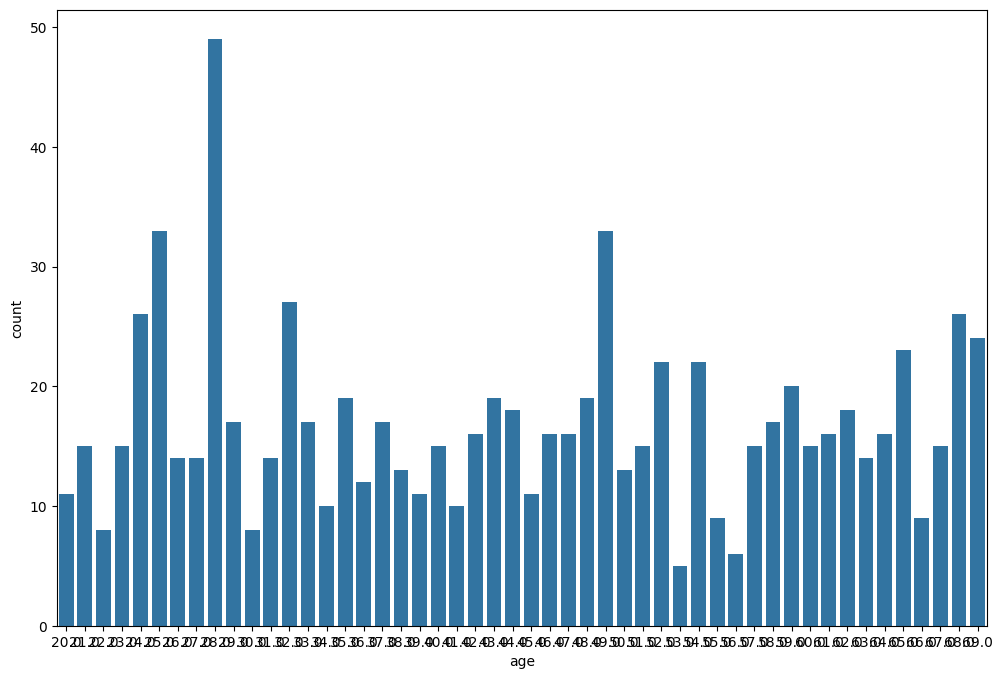

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(data=age_age, x="age", y="count")